In [1]:
import pandas as pd
df = pd.read_csv('artefatos/insurance_data_preprocessado.csv')

In [2]:

from sklearn.preprocessing import StandardScaler
X = df.drop(['claim', 'cluster', 'binned_claim'], axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
df.claim.describe()

count     1148.000000
mean      9265.739791
std       6211.502024
min       1121.870000
25%       4350.247500
50%       8144.250000
75%      12476.440000
max      28476.730000
Name: claim, dtype: float64

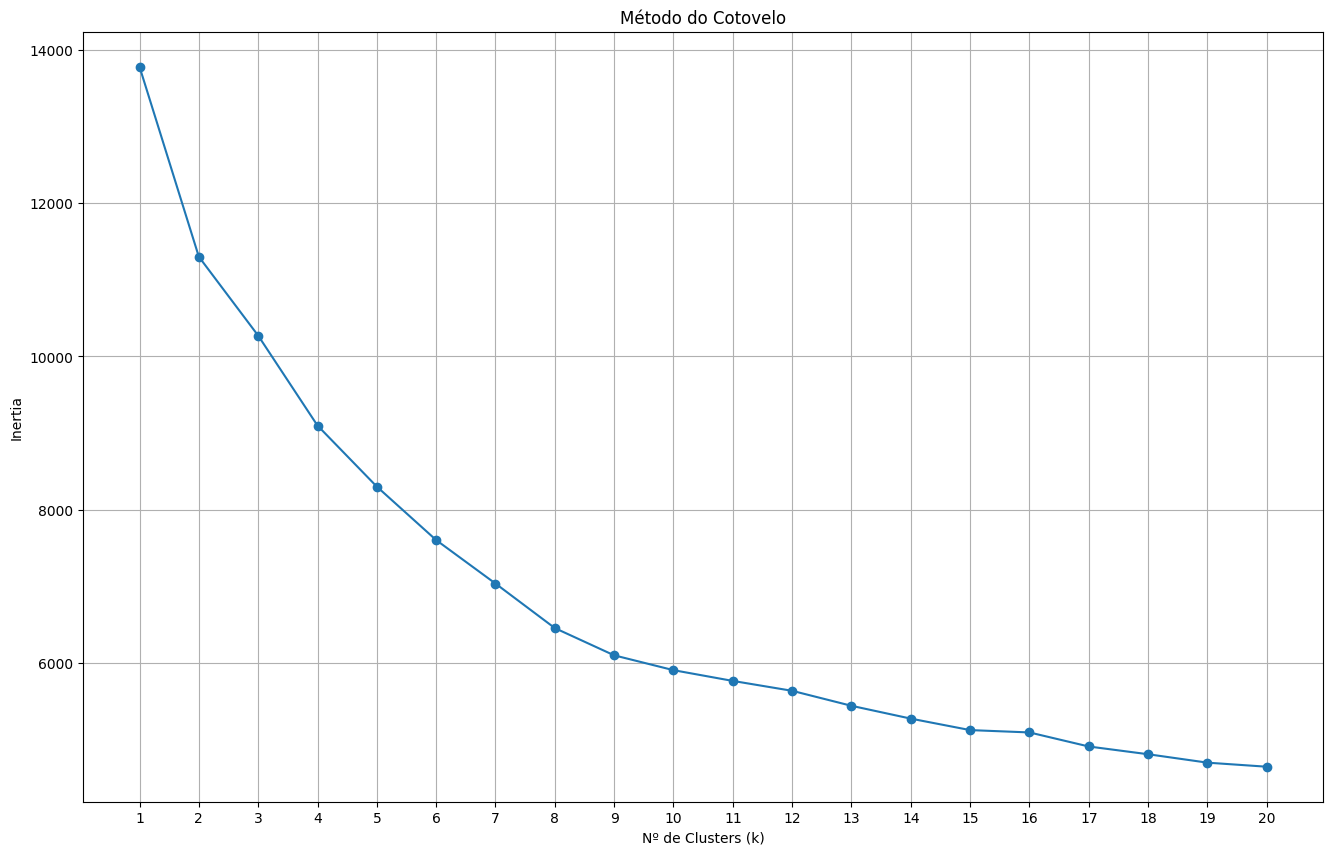

In [ ]:
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
os.environ['LOKY_MAX_CPU_COUNT'] = '-1' # Utiliza a quantidade máxima de processadores.

k_max = 21
inertia_values = []
for k in range(1, k_max):
    kmeans = KMeans(n_clusters=k, random_state=1408, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(16, 10))
plt.plot(range(1, k_max), inertia_values, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Nº de Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, k_max))
plt.grid(True)
plt.show()

## Vamos analisar o tamanho dos Clusters para observar se existe algum tipo de overfitting (clusters com uma quantidade muito pequena de entradas).

In [ ]:
for k in range(4, 11):
    print(f"\nContagem de Amostras por Cluster (k={k}):")
    
    kmeans = KMeans(n_clusters=k, random_state=1408, n_init=10)
    df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
    
    cluster_counts = df['kmeans_cluster'].value_counts().sort_index()
    for cluster, count in cluster_counts.items():
        print(f"  Cluster {cluster}: {count}")

    print('-' * 40)

In [ ]:
best_k = 8

In [ ]:
kmeans = KMeans(n_clusters=best_k, random_state=1408, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1408, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)
df['tsne_x'] = X_tsne[:, 0]
df['tsne_y'] = X_tsne[:, 1]

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='kmeans_cluster', palette='viridis')
plt.title('Clusters with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()